### Czy  forma studiów (studia dzienne vs zaoczne) wpływa na przyszłe zarobki?

***f(P_POZIOM) = (P_ME_ZAR lub P_WWZ)***

- ***P_POZIOM*** - Forma ukończonych studiów

- ***P_WWZ*** - Względny Wskaźnik Zarobków absolwentów po uzyskaniu dyplomu

- ***P_ME_ZAR*** - Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł po uzyskaniu dyplomu

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
graduates_data = pd.read_csv('data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu

/tmp/ipykernel_8960/727371864.py:8: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_8960/727371864.py:9: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=False.
  students_data = pd.read

In [2]:
# Convert columns in graduates_data
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB']):
        graduates_data[col] = graduates_data[col].str.replace(',', '.').astype(float)

In [3]:
def plot_graduate_distribution(data, column, study_type='S', num_bins=10, x_range=(0, 1), title_prefix='', xlabel=''):
    """
    Plots the distribution of the number of graduates (P_N) across specified ranges of a given column.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the data to plot.
    column (str): The column for which the distribution is plotted (e.g., 'P_ME_ZAR', 'P_WWZ').
    study_type (str): The type of study ('S' for full-time, 'N' for part-time).
    num_bins (int): Number of bins for the histogram.
    x_range (tuple): Range of x-axis values for binning.
    title_prefix (str): Prefix for the plot title.
    xlabel (str): Label for the x-axis.
    """
    # Filter data for the specific study type
    data_study = data[data['P_FORMA'] == study_type]

    # Define bin edges
    bins = np.linspace(x_range[0], x_range[1], num_bins + 1)

    # Group data by specified column bins and sum P_N
    study_groups = data_study.groupby(pd.cut(data_study[column], bins=bins))['P_N'].sum()

    # Plot the grouped data
    study_groups.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{title_prefix} Distribution of Number of Graduates (P_N) Across {xlabel} Ranges for {"Full-Time" if study_type == "S" else "Part-Time"} Studies (P_FORMA = {study_type})')
    plt.xlabel(xlabel)
    plt.ylabel('Number of Graduates')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [4]:
def plot_graduate_distribution(data, column, study_type='S', num_bins=10, x_range=(0, 1), title_prefix='', xlabel='', color_scheme=('green', 'blue')):
    """
    Plots the distribution of the number of graduates (P_N) across specified ranges of a given column.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the data to plot.
    column (str): The column for which the distribution is plotted (e.g., 'P_ME_ZAR', 'P_WWZ').
    study_type (str): The type of study ('S' for full-time, 'N' for part-time).
    num_bins (int): Number of bins for the histogram.
    x_range (tuple): Range of x-axis values for binning.
    title_prefix (str): Prefix for the plot title.
    xlabel (str): Label for the x-axis.
    color_scheme (tuple): Tuple of colors for full-time and part-time studies.
    """
    # Filter data for the specific study type
    data_study = data[data['P_FORMA'] == study_type]

    # Plot the histogram with KDE overlay
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data_study, 
        x=column, 
        weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=False, 
        color=color_scheme[0] if study_type == 'S' else color_scheme[1], 
        edgecolor="black", 
        alpha=0.6, 
        stat="count"
    )
    plt.title(f'{title_prefix} Distribution of Number of Graduates (P_N) Across {xlabel} Ranges for {"Full-Time" if study_type == "S" else "Part-Time"} Studies (P_FORMA = {study_type})')
    plt.xlabel(xlabel)
    plt.ylabel('Number of Graduates')
    plt.xlim(x_range)
    plt.tight_layout()
    plt.show()

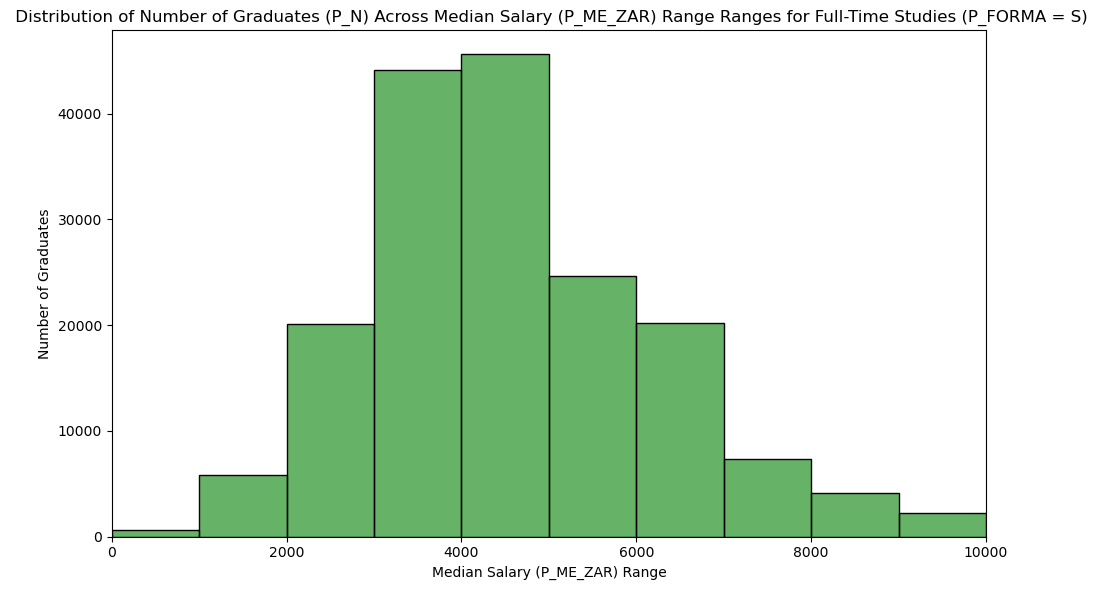

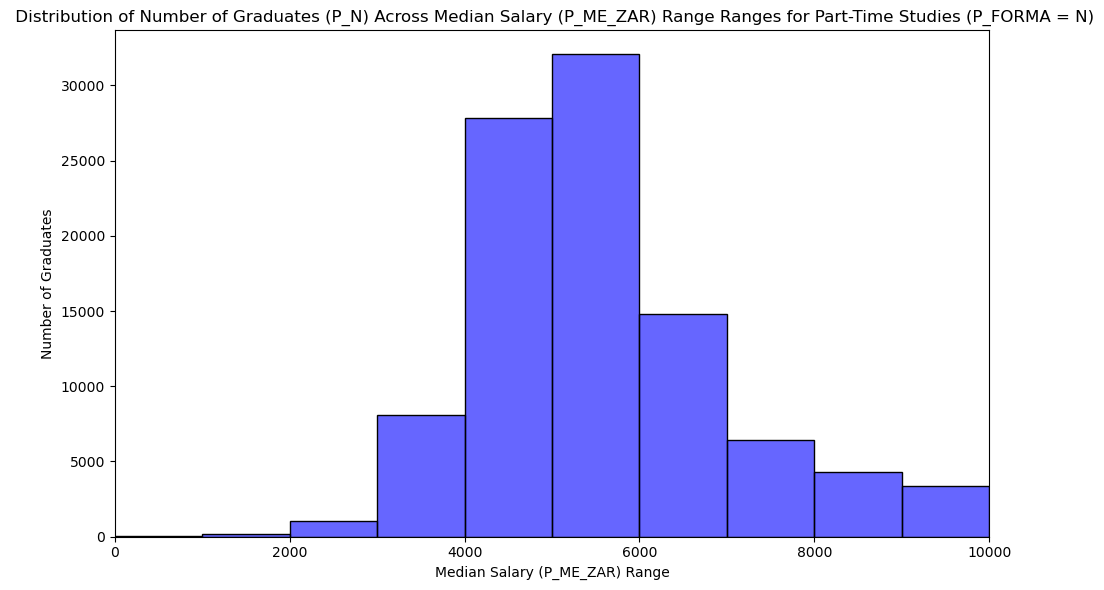

In [5]:
# Plotting distribution for Median Salary (P_ME_ZAR)
desired_year = 2022  # Replace with your desired graduation year
num_bins = 10
x_range = (0, 10000)

# Create a temporary DataFrame to avoid modifying graduates_data
temp_data = graduates_data[['P_FORMA', 'P_ME_ZAR', 'P_N', 'P_ROKDYP']].copy()

# Filter data for the specific graduation year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Plot for part-time studies ('S')
plot_graduate_distribution(
    data=temp_data,
    column='P_ME_ZAR',
    study_type='S',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Median Salary (P_ME_ZAR) Range'
)

# Plot for full-time studies ('N')
plot_graduate_distribution(
    data=temp_data,
    column='P_ME_ZAR',
    study_type='N',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Median Salary (P_ME_ZAR) Range'
)

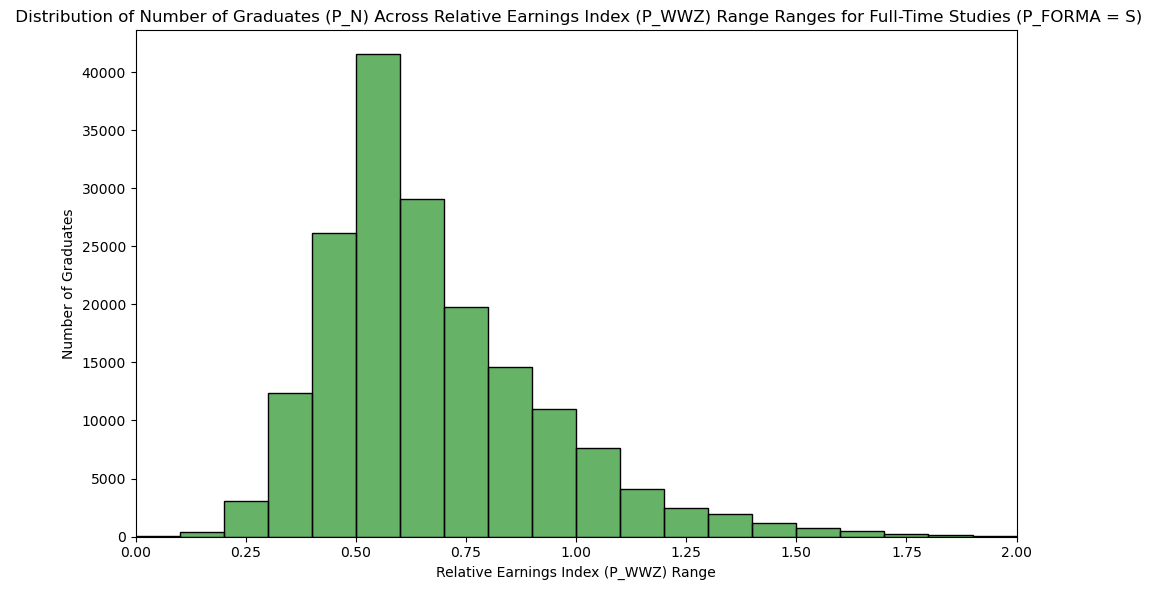

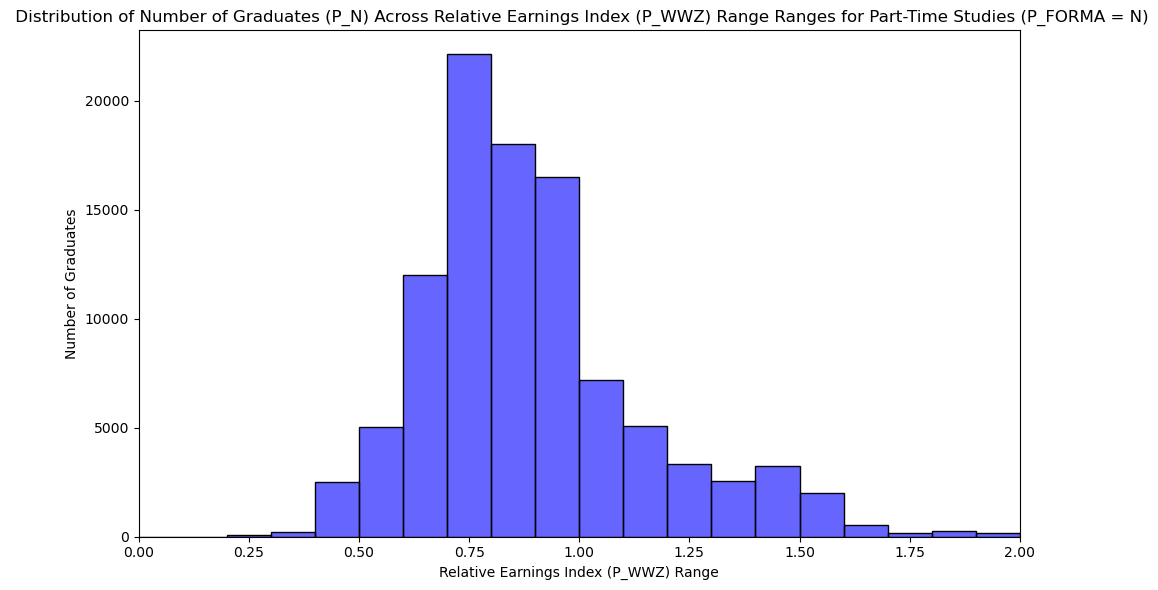

In [6]:
# Plotting distribution for Relative Earnings Index (P_WWZ)
desired_year = 2022  # Replace with your desired graduation year
num_bins = 20
x_range = (0, 2)

# Create a temporary DataFrame to avoid modifying graduates_data, and include P_WWZ
temp_data = graduates_data[['P_FORMA', 'P_WWZ', 'P_N', 'P_ROKDYP']].copy()

# Filter data for the specific graduation year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Plot for part-time studies ('S')
plot_graduate_distribution(
    data=temp_data,
    column='P_WWZ',
    study_type='S',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Relative Earnings Index (P_WWZ) Range'
)

# Plot for full-time studies ('N')
plot_graduate_distribution(
    data=temp_data,
    column='P_WWZ',
    study_type='N',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Relative Earnings Index (P_WWZ) Range'
)


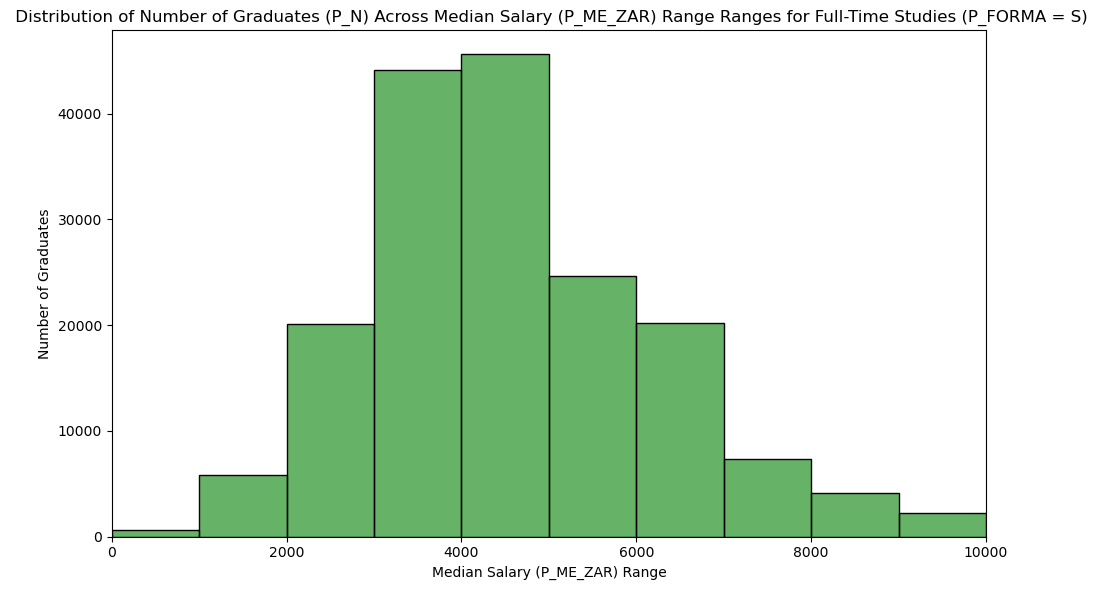

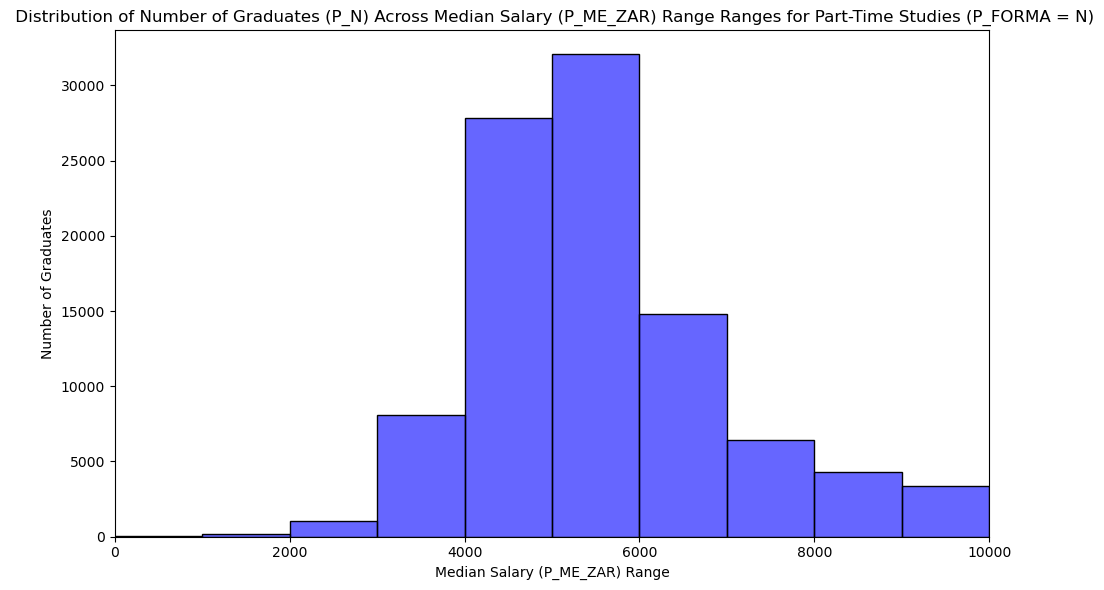

In [7]:
# Plotting distribution for Median Salary (P_ME_ZAR)
desired_year = 2022  # Replace with your desired graduation year
num_bins = 10
x_range = (0, 10000)

# Create a temporary DataFrame to avoid modifying graduates_data
temp_data = graduates_data[['P_FORMA', 'P_ME_ZAR', 'P_N', 'P_ROKDYP']].copy()

# Filter data for the specific graduation year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Plot for part-time studies ('S')
plot_graduate_distribution(
    data=temp_data,
    column='P_ME_ZAR',
    study_type='S',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Median Salary (P_ME_ZAR) Range'
)

# Plot for full-time studies ('N')
plot_graduate_distribution(
    data=temp_data,
    column='P_ME_ZAR',
    study_type='N',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Median Salary (P_ME_ZAR) Range'
)

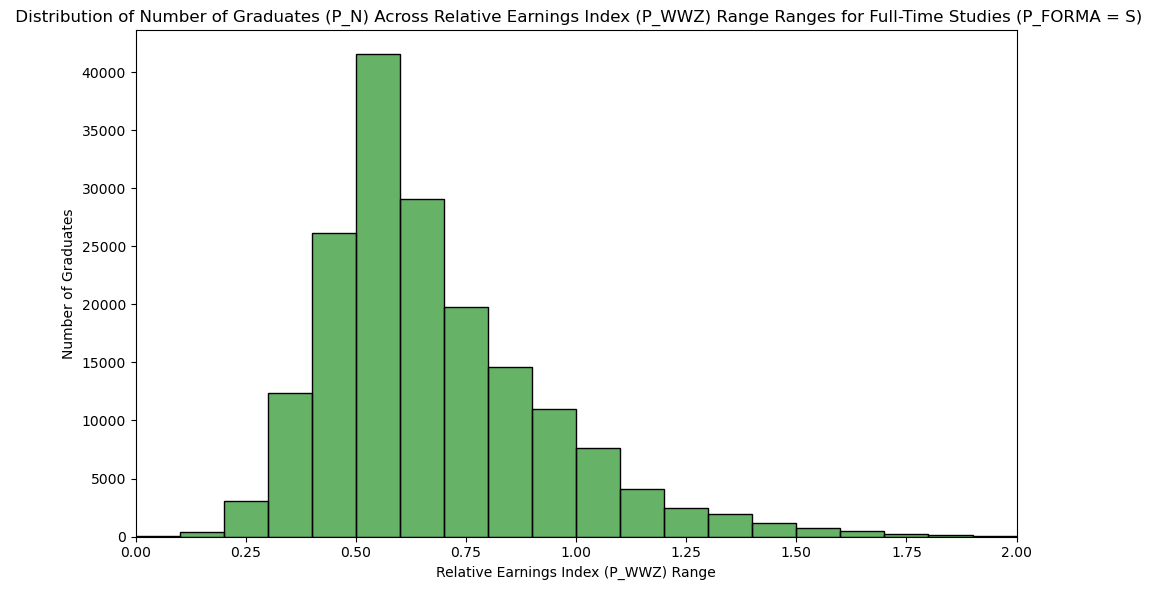

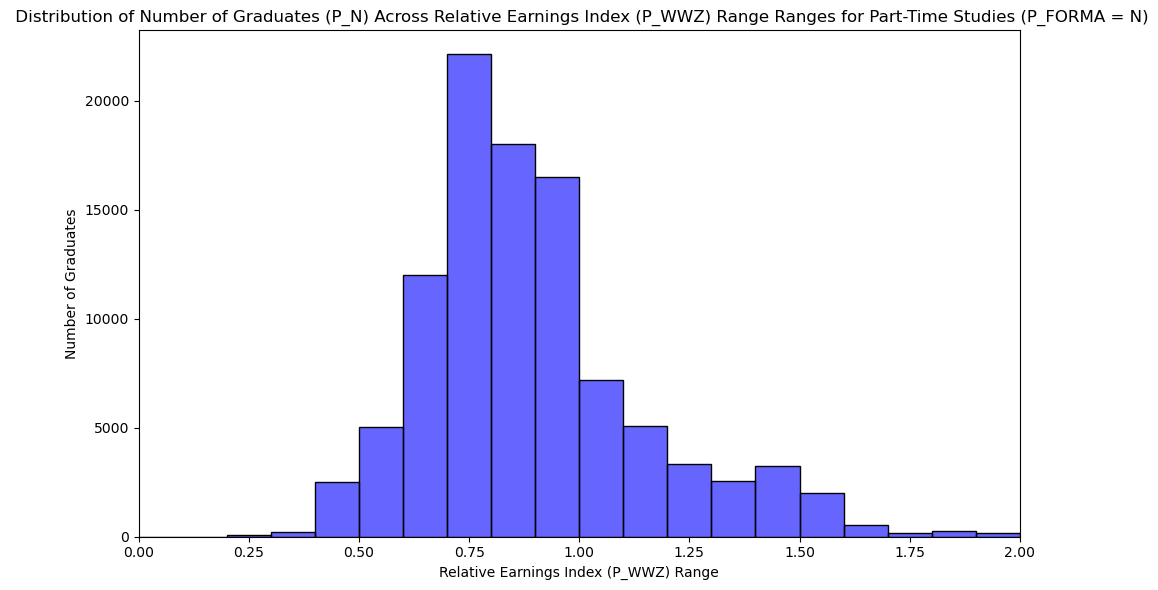

In [8]:
# Plotting distribution for Relative Earnings Index (P_WWZ)
desired_year = 2022  # Replace with your desired graduation year
num_bins = 20
x_range = (0, 2)

# Create a temporary DataFrame to avoid modifying graduates_data, and include P_WWZ
temp_data = graduates_data[['P_FORMA', 'P_WWZ', 'P_N', 'P_ROKDYP']].copy()

# Filter data for the specific graduation year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Plot for part-time studies ('S')
plot_graduate_distribution(
    data=temp_data,
    column='P_WWZ',
    study_type='S',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Relative Earnings Index (P_WWZ) Range'
)

# Plot for full-time studies ('N')
plot_graduate_distribution(
    data=temp_data,
    column='P_WWZ',
    study_type='N',
    num_bins=num_bins,
    x_range=x_range,
    title_prefix='',
    xlabel='Relative Earnings Index (P_WWZ) Range'
)

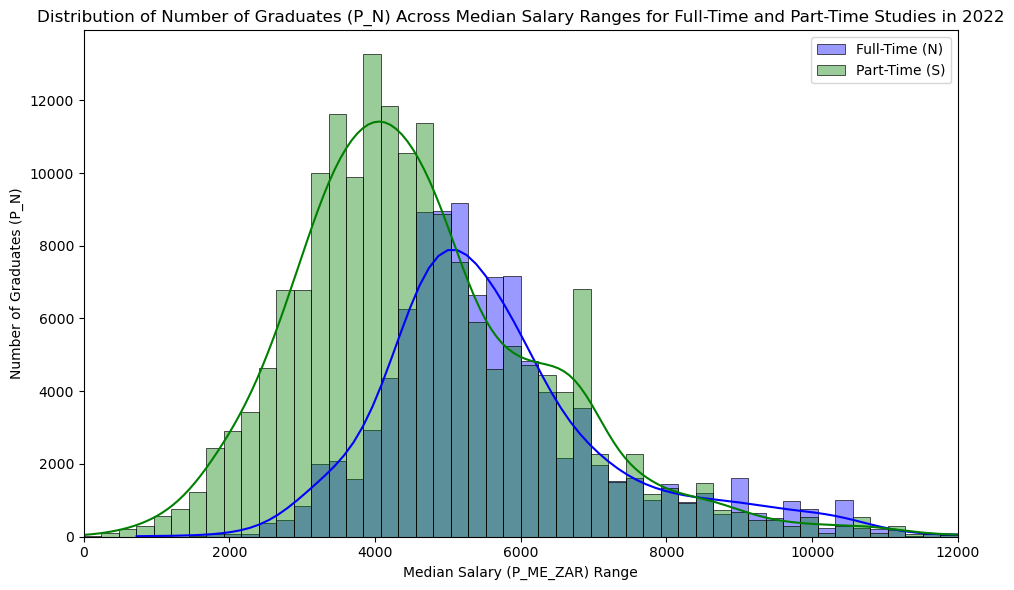

In [9]:
# Set the desired year for analysis
desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 12000)

# Create a temporary DataFrame to avoid modifying graduates_data
temp_data = graduates_data[['P_FORMA', 'P_ME_ZAR', 'P_N', 'P_ROKDYP']].copy()

# Filter data for the specific graduation year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Define a function to plot both full-time and part-time data on the same plot
def plot_combined_graduate_distribution(data=temp_data, num_bins=num_bins, x_range=x_range):
    # Filter data for full-time and part-time study types
    data_full_time = data[data['P_FORMA'] == 'N']
    data_part_time = data[data['P_FORMA'] == 'S']

    # Plot the histogram with KDE overlay for both study types
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data_full_time, 
        x='P_ME_ZAR', 
        weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=True, 
        color="blue", 
        edgecolor="black", 
        alpha=0.4, 
        stat="count", 
        label='Full-Time (N)'
    )
    sns.histplot(
        data=data_part_time, 
        x='P_ME_ZAR', 
        weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=True, 
        color="green", 
        edgecolor="black", 
        alpha=0.4, 
        stat="count", 
        label='Part-Time (S)'
    )

    plt.title(f'Distribution of Number of Graduates (P_N) Across Median Salary Ranges for Full-Time and Part-Time Studies in {desired_year}')
    plt.xlabel('Median Salary (P_ME_ZAR) Range')
    plt.ylabel('Number of Graduates (P_N)')
    plt.xlim(x_range)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot combined data for both full-time ('N') and part-time ('S')
plot_combined_graduate_distribution()


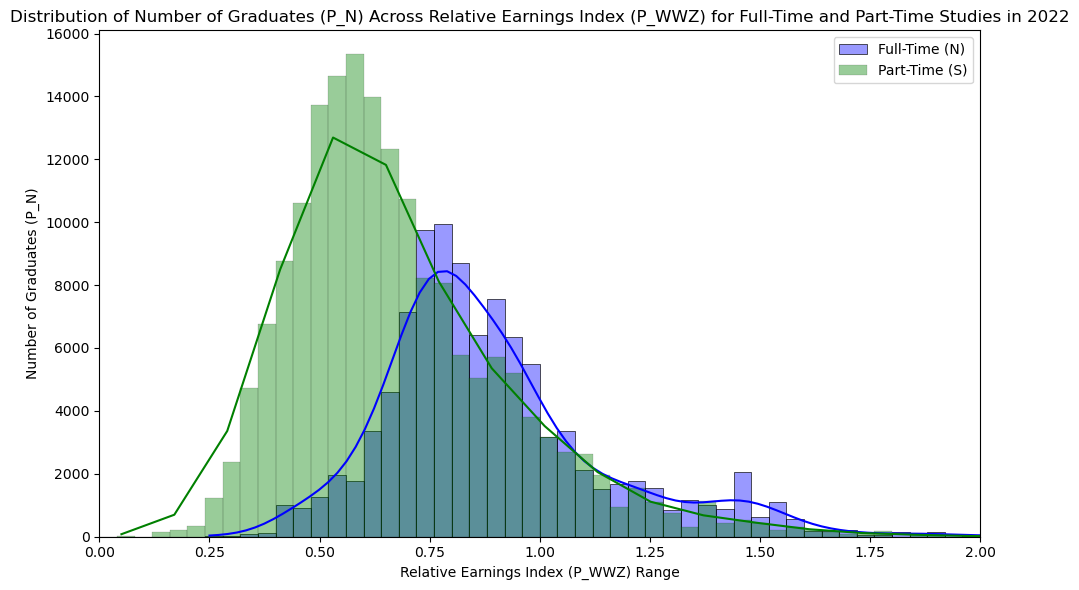

In [10]:
# Set the desired year for analysis
desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 2)

# Create a temporary DataFrame to avoid modifying graduates_data, and include P_WWZ
temp_data = graduates_data[['P_FORMA', 'P_WWZ', 'P_N', 'P_ROKDYP']].copy()

# Filter data for the specific graduation year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Define a function to plot both full-time and part-time data on the same plot
def plot_combined_graduate_distribution(data=temp_data, num_bins=num_bins, x_range=x_range):
    # Filter data for full-time and part-time study types
    data_full_time = data[data['P_FORMA'] == 'N']
    data_part_time = data[data['P_FORMA'] == 'S']

    # Plot the histogram for both study types
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data_full_time, 
        x='P_WWZ', 
        weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=True, 
        color="blue", 
        edgecolor="black", 
        alpha=0.4, 
        stat="count", 
        label='Full-Time (N)'
    )
    sns.histplot(
        data=data_part_time, 
        x='P_WWZ', 
        weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=True, 
        color="green", 
        edgecolor="black", 
        alpha=0.4, 
        stat="count", 
        label='Part-Time (S)'
    )

    plt.title(f'Distribution of Number of Graduates (P_N) Across Relative Earnings Index (P_WWZ) for Full-Time and Part-Time Studies in {desired_year}')
    plt.xlabel('Relative Earnings Index (P_WWZ) Range')
    plt.ylabel('Number of Graduates (P_N)')
    plt.xlim(x_range)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot combined data for both full-time ('N') and part-time ('S')
plot_combined_graduate_distribution()

<Figure size 1000x600 with 0 Axes>

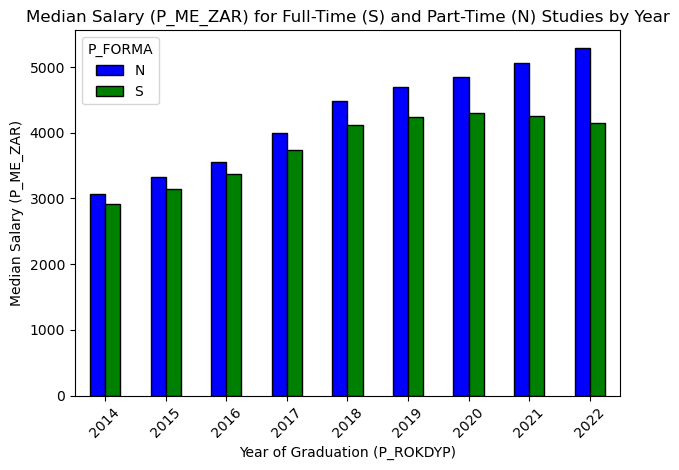

In [11]:
# Create a temporary DataFrame to avoid modifying graduates_data, and include P_ME_ZAR
temp_data = graduates_data[['P_FORMA', 'P_ME_ZAR', 'P_ROKDYP']].copy()

# Group data by year and form of study, calculating the median salary
grouped_data = temp_data.groupby(['P_ROKDYP', 'P_FORMA'])['P_ME_ZAR'].median().reset_index()

# Pivot data for easy plotting
pivot_data = grouped_data.pivot(index='P_ROKDYP', columns='P_FORMA', values='P_ME_ZAR')

# Plot the median salary for each year as a bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=False, color={"N": "blue", "S": "green"}, edgecolor="black")
plt.title('Median Salary (P_ME_ZAR) for Full-Time (S) and Part-Time (N) Studies by Year')
plt.xlabel('Year of Graduation (P_ROKDYP)')
plt.ylabel('Median Salary (P_ME_ZAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

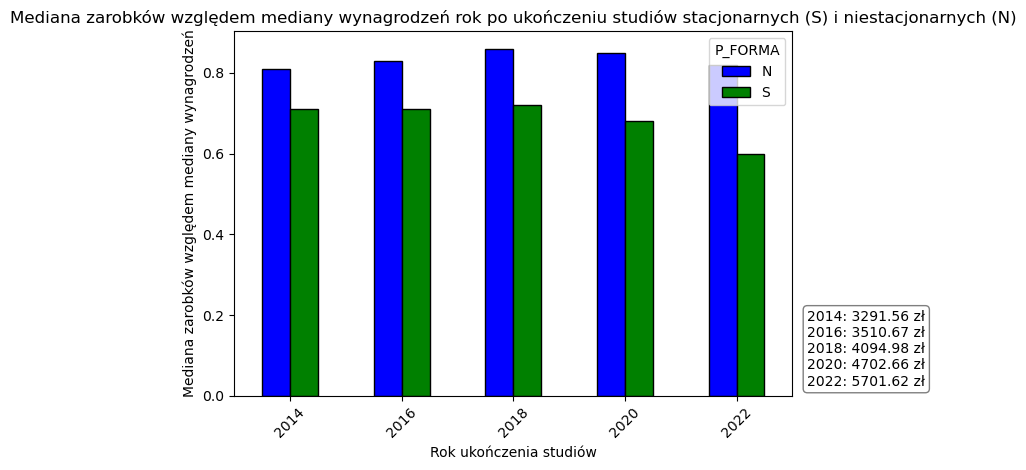

In [ ]:
# Utwórz tymczasowy DataFrame, aby uniknąć modyfikacji graduates_data, i uwzględnij P_WWZ
temp_data = graduates_data[['P_FORMA', 'P_WWZ', 'P_ROKDYP']].copy()

# Filtrowanie danych dla wybranych lat
years_of_interest = [2014, 2016, 2018, 2020, 2022]
temp_data = temp_data[temp_data['P_ROKDYP'].isin(years_of_interest)]

# Grupowanie danych według roku i formy studiów, obliczanie mediany P_WWZ
grouped_data = temp_data.groupby(['P_ROKDYP', 'P_FORMA'])['P_WWZ'].median().reset_index()

# Utwórz słownik z referencyjnymi wartościami median
median = {
    2014: 3291.56,
    2016: 3510.67,
    2018: 4094.98,
    2020: 4702.66,
    2022: 5701.62,
}

# Przekształcenie danych do łatwego rysowania
pivot_data = grouped_data.pivot(index='P_ROKDYP', columns='P_FORMA', values='P_WWZ')

# Rysowanie mediany P_WWZ dla każdego roku jako wykresu słupkowego
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='bar', stacked=False, color={"N": "blue", "S": "green"}, edgecolor="black")
plt.title('Median earnings compared to the median salary one year after completing full-time (S) and part-time (N) studies')
plt.xlabel('Year of graduation')
plt.ylabel('Median earnings compared to the median salary')
plt.xticks(rotation=45)

# Dodanie pola tekstowego z wartościami median dla każdego roku w dolnym lewym rogu
textstr = '\n'.join([f"{year}: {median[year]} zł" for year in years_of_interest])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.gcf().text(1, 0.18, textstr, fontsize=10, verticalalignment='bottom', bbox=props)

plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

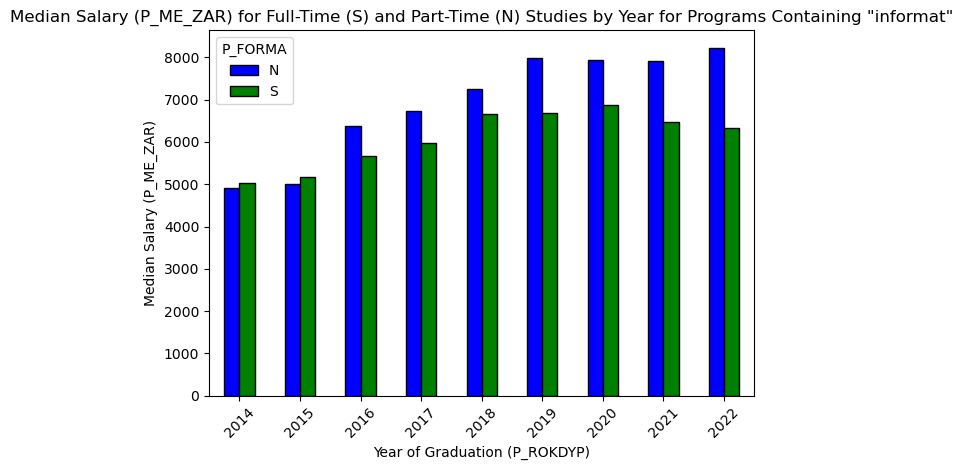

In [15]:
# Filter the data to only include programs that contain the value in `var` (e.g., 'filologia')
var = 'informat'
temp_data = graduates_data[graduates_data['P_KIERUNEK_NAZWA'].str.contains(var, case=False, na=False)]

# Create a temporary DataFrame to avoid modifying graduates_data, and include P_ME_ZAR
temp_data = temp_data[['P_FORMA', 'P_ME_ZAR', 'P_ROKDYP']].copy()

# Group data by year and form of study, calculating the median salary
grouped_data = temp_data.groupby(['P_ROKDYP', 'P_FORMA'])['P_ME_ZAR'].median().reset_index()

# Pivot data for easy plotting
pivot_data = grouped_data.pivot(index='P_ROKDYP', columns='P_FORMA', values='P_ME_ZAR')

# Plot the median salary for each year as a bar chart
plt.figure(figsize=(14, 7))
ax = pivot_data.plot(kind='bar', stacked=False, color={"S": "green", "N": "blue"}, edgecolor="black")
plt.title(f'Median Salary (P_ME_ZAR) for Full-Time (S) and Part-Time (N) Studies by Year for Programs Containing "{var}"')
plt.xlabel('Year of Graduation (P_ROKDYP)')
plt.ylabel('Median Salary (P_ME_ZAR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
